# KNN Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,19598943,Male,35,134000,1
1,15694829,Female,32,150000,1
2,15735878,Male,52,150000,1
3,15675949,Female,33,149000,1
4,15701537,Male,42,149000,1


In [4]:
dataset=dataset.drop("User ID",axis=1)

In [5]:
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,35,134000,1
1,Female,32,150000,1
2,Male,52,150000,1
3,Female,33,149000,1
4,Male,42,149000,1


In [6]:
pd.isnull(dataset[["Gender","Age",'EstimatedSalary']]).sum()

Gender             0
Age                0
EstimatedSalary    0
dtype: int64

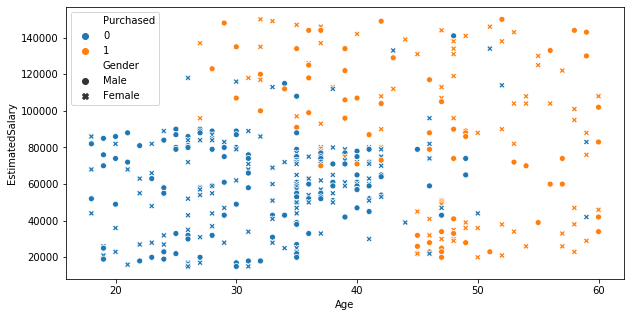

In [7]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Age', y='EstimatedSalary', style='Gender', hue='Purchased', data=dataset)
plt.show()

In [8]:
x=dataset.iloc[: , 1:3].values
y=dataset.iloc[:,3:].values

In [9]:
x


array([[    35, 134000],
       [    32, 150000],
       [    52, 150000],
       [    33, 149000],
       [    42, 149000],
       [    29, 148000],
       [    35, 147000],
       [    51, 146000],
       [    37, 146000],
       [    37, 144000],
       [    36, 144000],
       [    47, 144000],
       [    58, 144000],
       [    59, 143000],
       [    53, 143000],
       [    40, 142000],
       [    48, 141000],
       [    49, 141000],
       [    44, 139000],
       [    48, 138000],
       [    52, 138000],
       [    27, 137000],
       [    37, 137000],
       [    30, 135000],
       [    32, 135000],
       [    39, 134000],
       [    48, 134000],
       [    39, 134000],
       [    51, 134000],
       [    56, 133000],
       [    43, 133000],
       [    45, 131000],
       [    48, 131000],
       [    55, 130000],
       [    59, 130000],
       [    43, 129000],
       [    36, 126000],
       [    55, 125000],
       [    36, 125000],
       [    28, 123000],


In [10]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
    

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=666)

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier


In [41]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [42]:
y_pred=knn.predict(x_test)

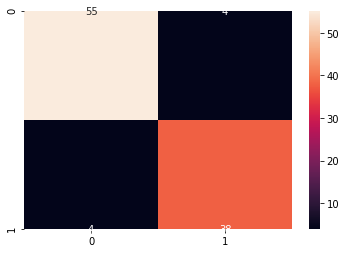

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score
cm= confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,)

In [44]:
accuracy=accuracy_score(y_test,y_pred)*100
print("accuracy score = {}".format(accuracy))

accuracy score = 92.07920792079209


In [45]:
rs=recall_score(y_test,y_pred)*100
print("recall score = {}".format(rs))

recall score = 90.47619047619048


In [46]:

# Asking questions from the model
questions = np.array([[40, 50000], [35, 100000]])
questions_transformed = sc.transform(questions)
answers = knn.predict(questions_transformed)
print(answers)

[0 1]


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWar

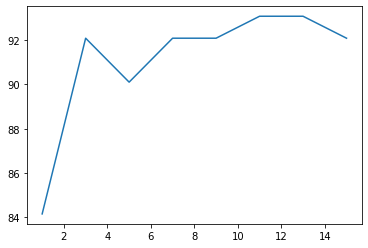

In [47]:

# Finding the optimal number of neighbours
accuracies = []
for n in range(1,16,2):
    classifier = KNeighborsClassifier(n_neighbors=n)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracies.append(cm.diagonal().sum() * 100 / cm.sum())

sns.lineplot(x = range(1,16,2), y = accuracies)